## **The Lannister Data Chronicles : Decrypting Diabetes**


**Import Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

## **Chunk 1**

the starting set of data 
   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9   

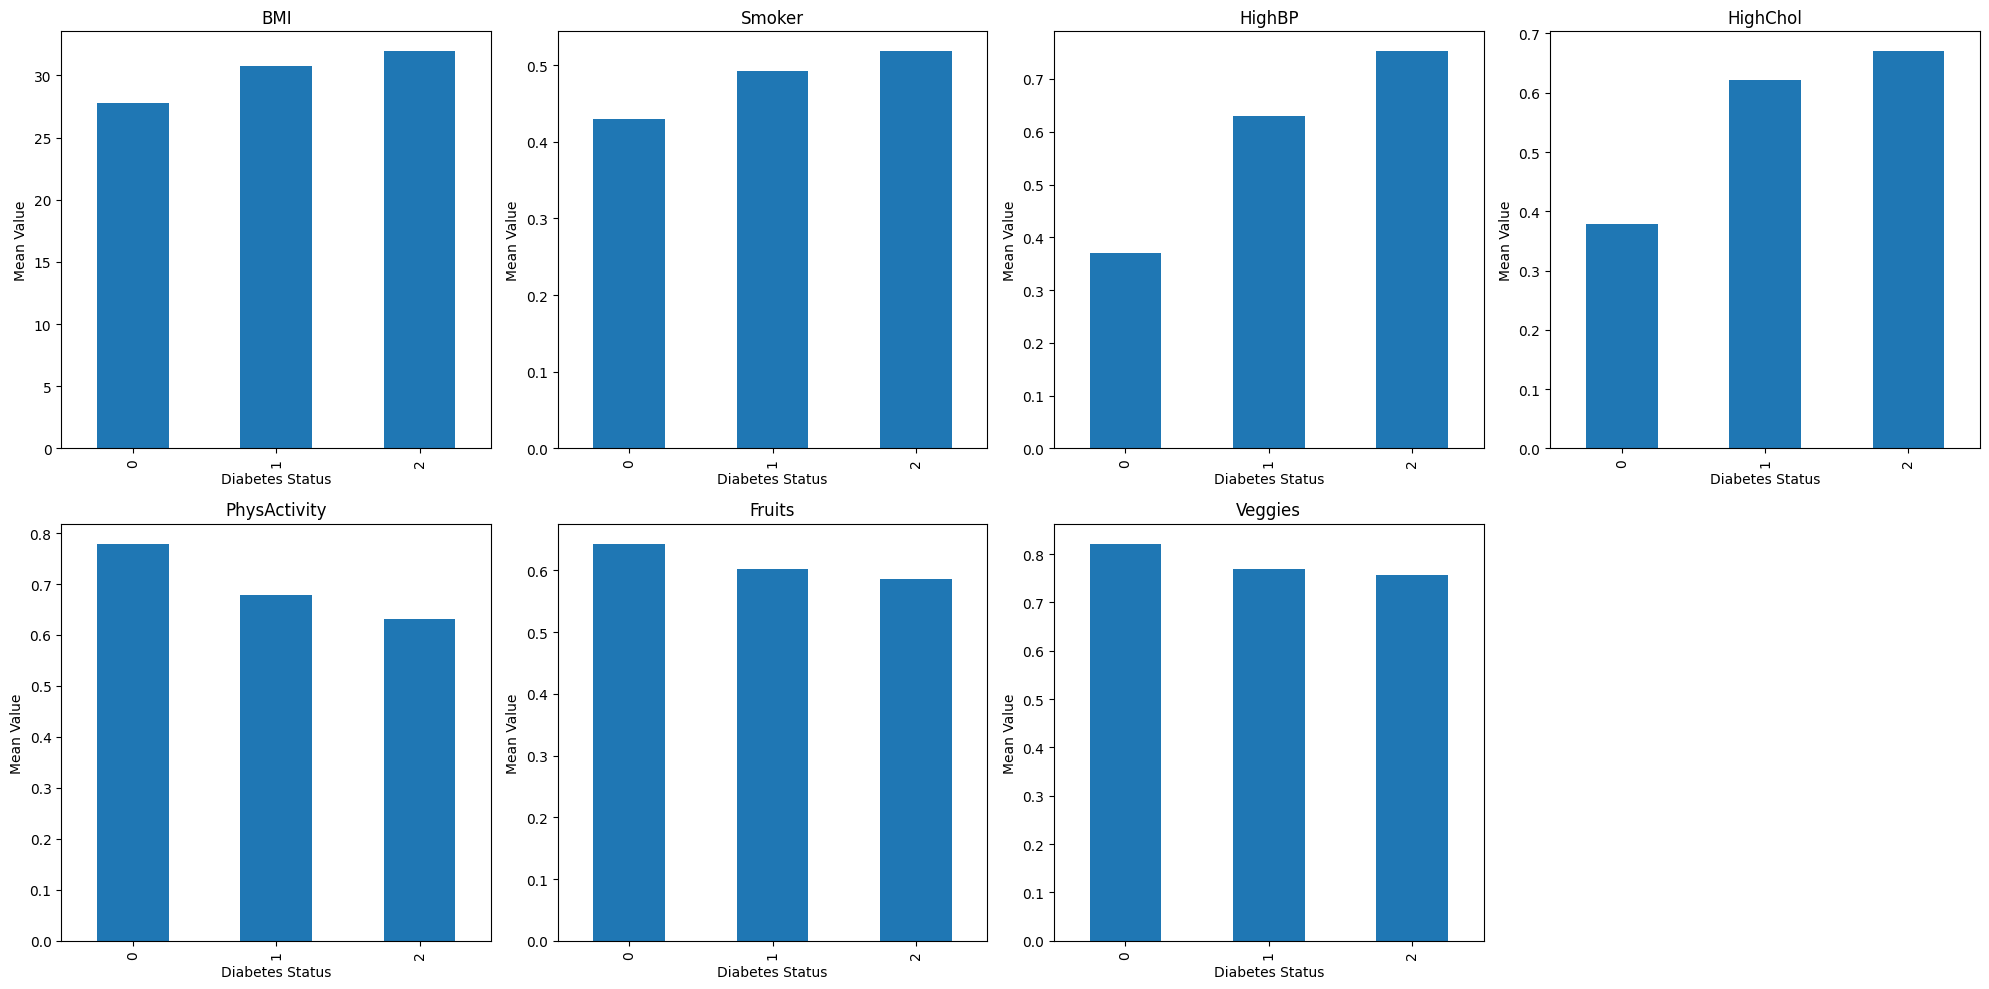

In [ ]:
file_path = "The Lannister Data Chronicles_ Decrypting Diabetes.csv"
diabetes_data = pd.read_csv(file_path)

print("the starting set of data ")
print(diabetes_data.head())

diabetes_status_distribution = diabetes_data['Diabetes_012'].value_counts(normalize=True) * 100
print("Distribution of Diabetes Status:")
print(diabetes_status_distribution)



health_behaviors = ['BMI', 'Smoker', 'HighBP', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies']


mean_values_by_status = diabetes_data.groupby('Diabetes_012')[health_behaviors].mean()
print("\nMean Values of Health Behaviors by Diabetes Status:")
print(mean_values_by_status)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, behavior in enumerate(health_behaviors):
    mean_values_by_status[behavior].plot(kind='bar', ax=axes[i], title=behavior)
    axes[i].set_xlabel('Diabetes Status')
    axes[i].set_ylabel('Mean Value')


fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

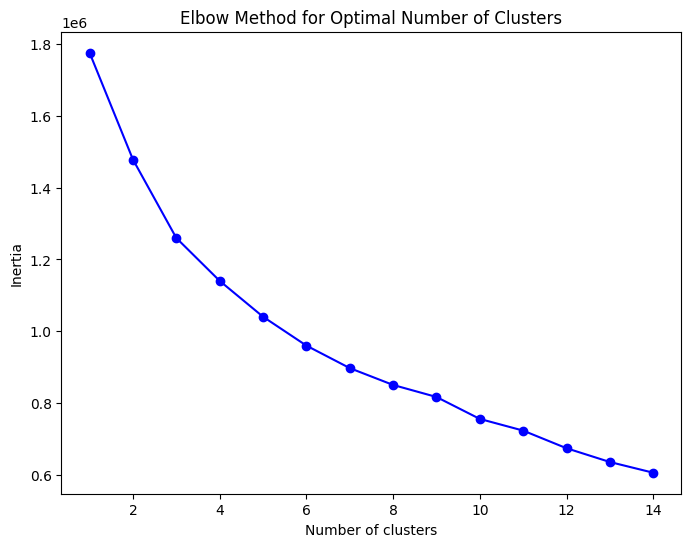

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Profiles:
               BMI    Smoker    HighBP  HighChol  PhysActivity    Fruits  \
Cluster                                                                    
0        30.179246  0.495065  0.986936  0.589693      0.724842  0.673548   
1        26.739964  0.392947  0.000025  0.287921      0.834104  0.707615   
2        29.236063  0.474780  0.491900  0.464997      0.620205  0.380150   

         Veggies  
Cluster           
0            1.0  
1            1.0  
2            0.0  


In [ ]:
features = diabetes_data[['BMI', 'Smoker', 'HighBP', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


inertia = []


K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


diabetes_data['Cluster'] = clusters

cluster_profiles = diabetes_data.groupby('Cluster')[['BMI', 'Smoker', 'HighBP', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies']].mean()
print("\nCluster Profiles:")
print(cluster_profiles)

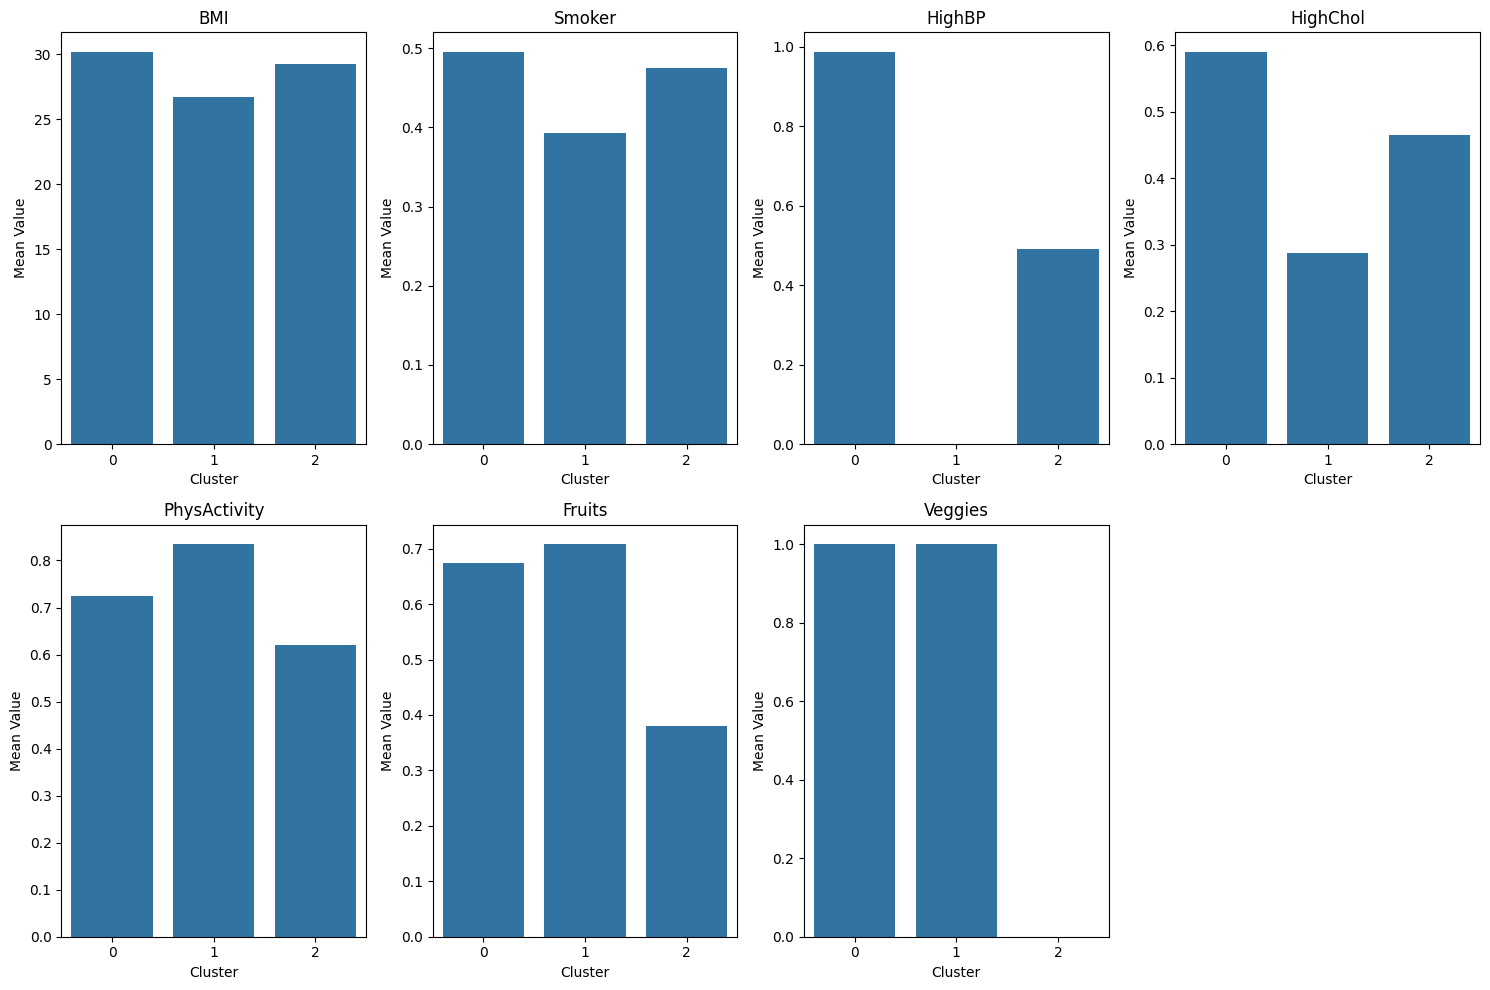


Diabetes Status Distribution within Clusters:
Diabetes_012          0         1          2
Cluster                                     
0             74.070560  2.579175  23.350266
1             93.394631  1.115410   5.489960
2             79.765463  2.236669  17.997868


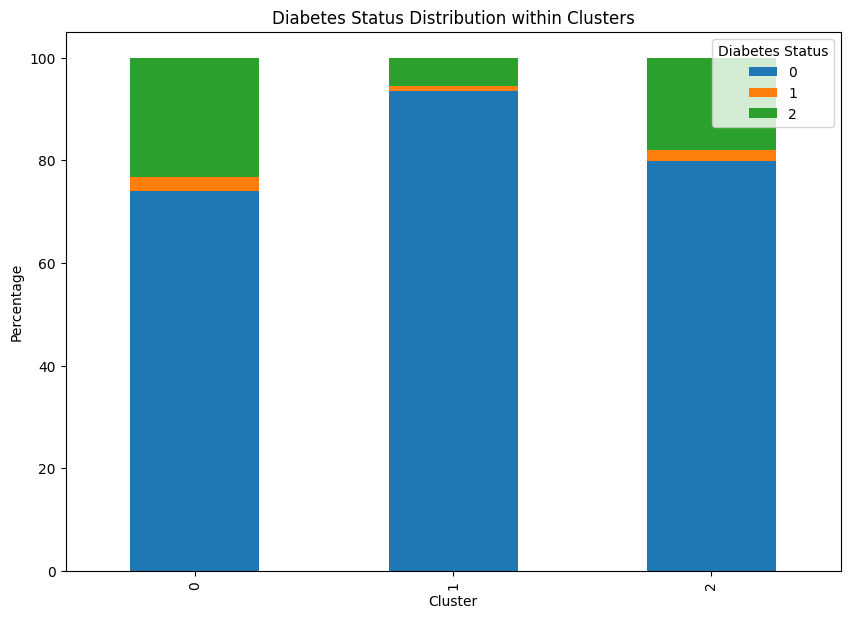

In [ ]:

plt.figure(figsize=(15, 10))
for i, behavior in enumerate(health_behaviors):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[behavior])
    plt.title(behavior)
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()


cluster_diabetes_distribution = diabetes_data.groupby('Cluster')['Diabetes_012'].value_counts(normalize=True).unstack() * 100
print("\nDiabetes Status Distribution within Clusters:")
print(cluster_diabetes_distribution)

cluster_diabetes_distribution.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Diabetes Status Distribution within Clusters')
plt.legend(title='Diabetes Status')
plt.show()

## **Chunk 3**


Cluster 0 Profile:
       Diabetes_012        HighBP      HighChol     CholCheck           BMI  \
count  86423.000000  86423.000000  86423.000000  86423.000000  86423.000000   
mean       0.492797      0.986936      0.589693      0.984530     30.179246   
std        0.846736      0.113548      0.491892      0.123415      7.542200   
min        0.000000      0.000000      0.000000      0.000000     13.000000   
25%        0.000000      1.000000      0.000000      1.000000     26.000000   
50%        0.000000      1.000000      1.000000      1.000000     29.000000   
75%        1.000000      1.000000      1.000000      1.000000     33.000000   
max        2.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  86423.000000  86423.000000          86423.000000  86423.000000   
mean       0.495065      0.064381              0.158372      0.724842   
std        0.499979      0.245432              0.

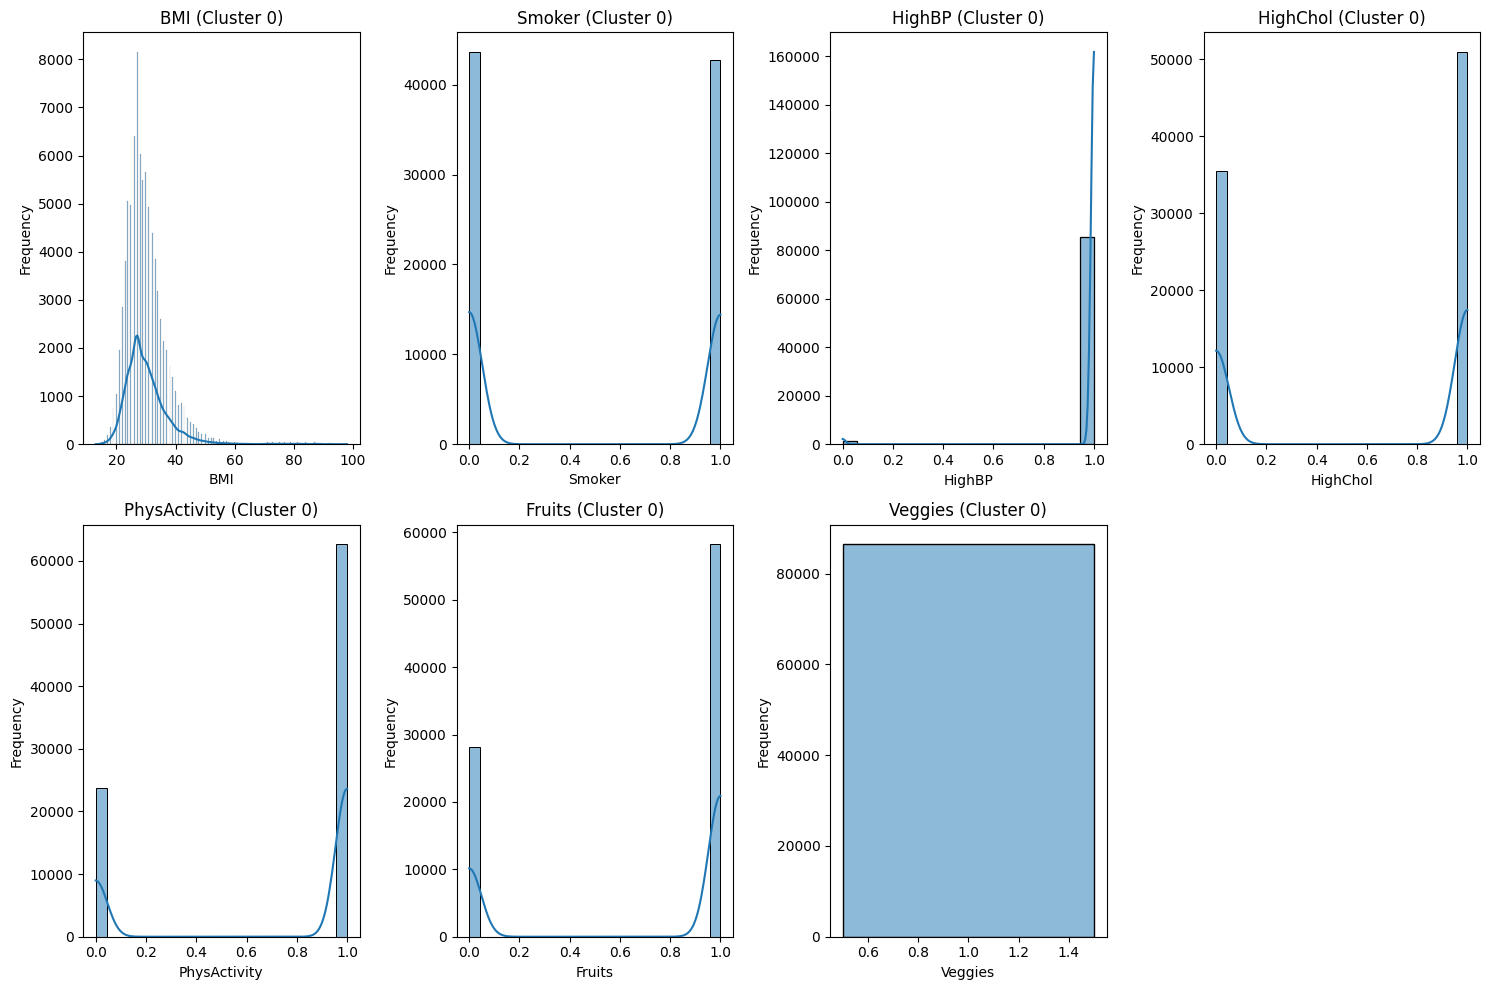


Cluster 1 Profile:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  119418.000000  119418.000000  119418.000000  119418.000000   
mean        0.120953       0.000025       0.287921       0.947814   
std         0.464892       0.005012       0.452796       0.222404   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  119418.000000  119418.000000  119418.000000         119418.000000   
mean       26.739964       0.392947       0.016597              0.038227   
std         5.190798       0.488407       0.127757              0.191745   
min        12.000000       0.000000       0.000000    

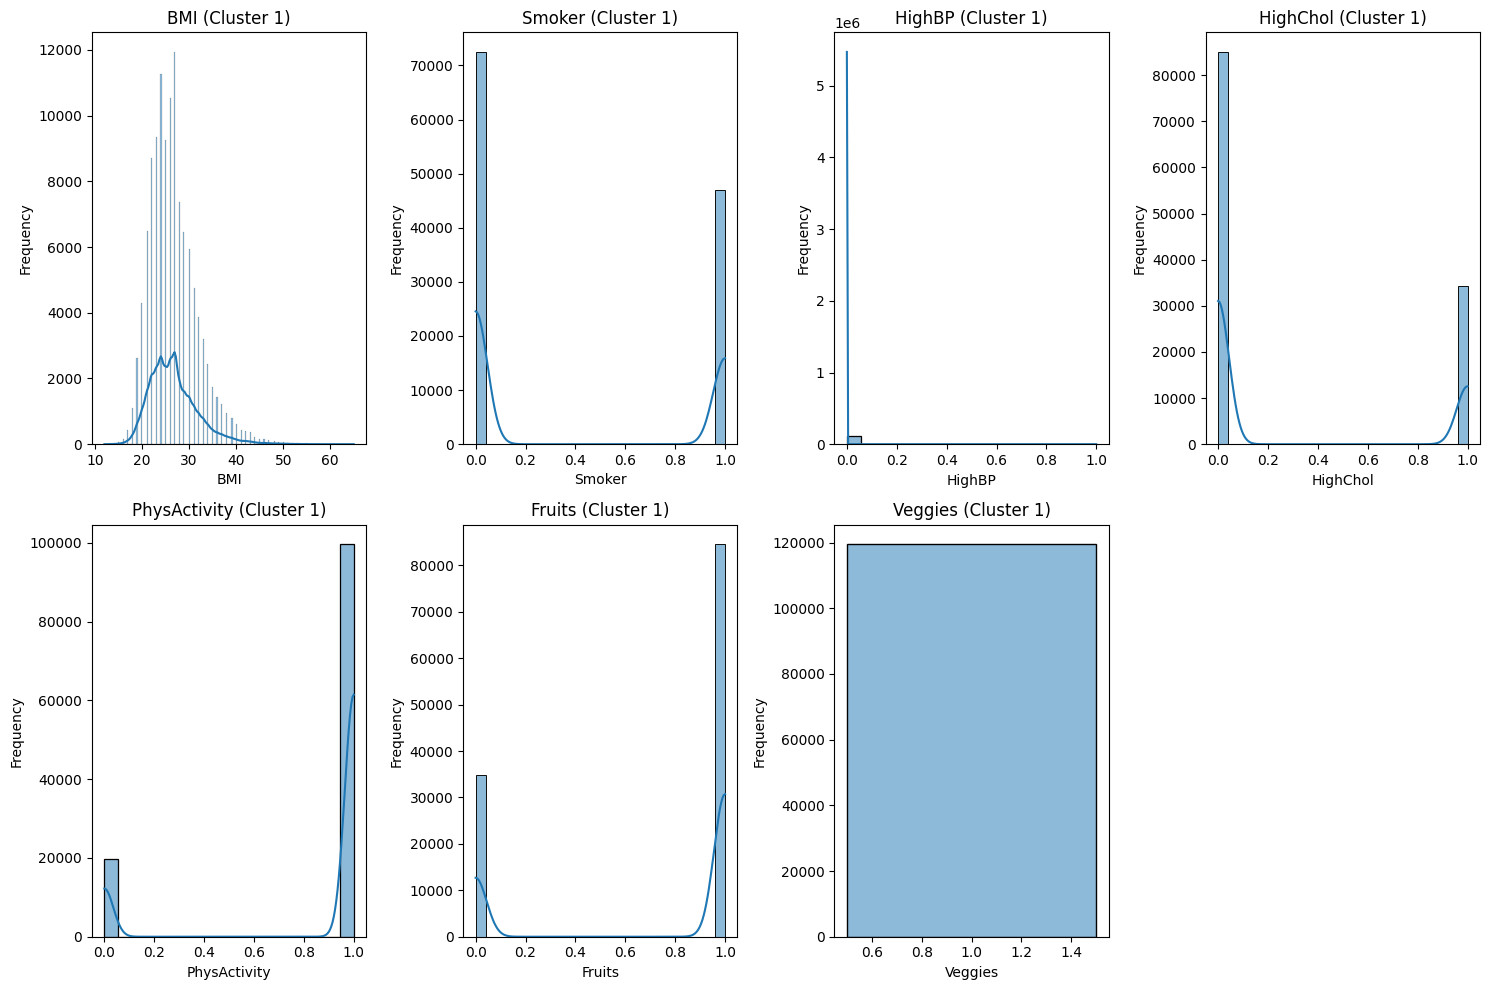


Cluster 2 Profile:
       Diabetes_012       HighBP      HighChol     CholCheck           BMI  \
count  47839.000000  47839.00000  47839.000000  47839.000000  47839.000000   
mean       0.382324      0.49190      0.464997      0.960263     29.236063   
std        0.772089      0.49994      0.498779      0.195344      6.948415   
min        0.000000      0.00000      0.000000      0.000000     12.000000   
25%        0.000000      0.00000      0.000000      1.000000     25.000000   
50%        0.000000      0.00000      0.000000      1.000000     28.000000   
75%        0.000000      1.00000      1.000000      1.000000     32.000000   
max        2.000000      1.00000      1.000000      1.000000     95.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  47839.000000  47839.000000          47839.000000  47839.000000   
mean       0.474780      0.057401              0.117916      0.620205   
std        0.499369      0.232609              0.322512   

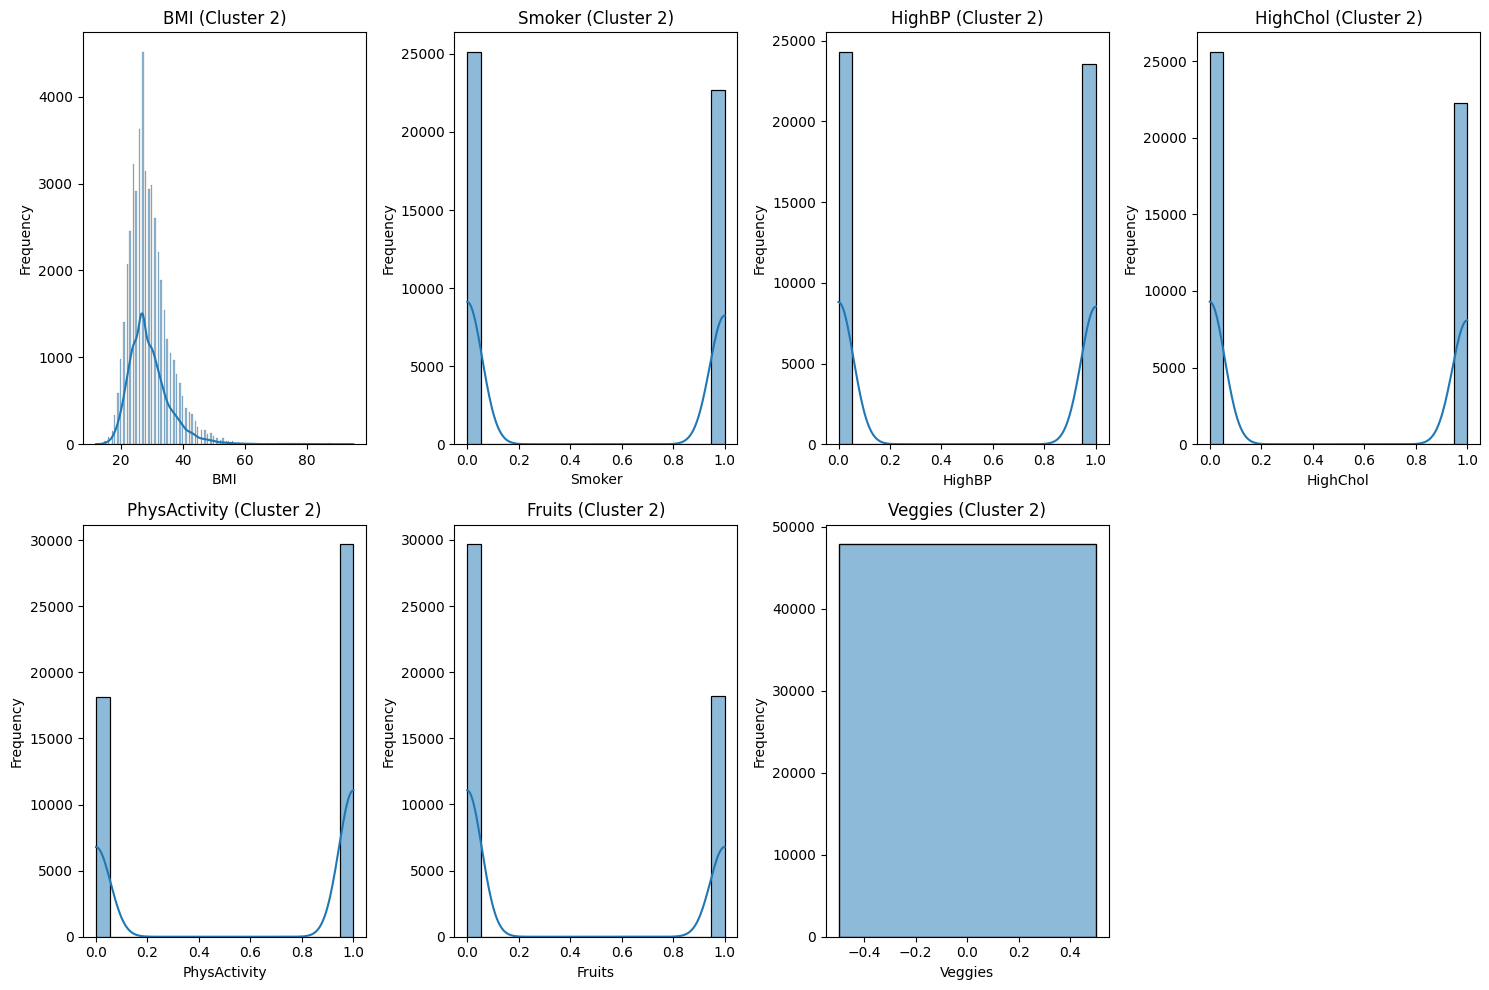

In [ ]:


for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Profile:")
    cluster_data = diabetes_data[diabetes_data['Cluster'] == cluster]
    print(cluster_data.describe())


    plt.figure(figsize=(15, 10))
    for i, behavior in enumerate(health_behaviors):
        plt.subplot(2, 4, i+1)
        sns.histplot(cluster_data[behavior], kde=True)
        plt.title(f"{behavior} (Cluster {cluster})")
        plt.xlabel(behavior)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



## **Chunk 4**

Missing Values in Each Column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Cluster                 0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     64180
           1       0.00      0.00      0.00      1425
           2       0.47      0.06      0.11     10499

    accuracy                           0.84     76104
   macro avg       0.44      0.35      0.34     76104
weighted avg       0.78      0.84      0.79     76104

Confusion Matrix:
 [[63518     0   662]
 [ 1381     0    44]
 [ 9866     0   633]]
Feature Importance:
         Feature  Importance
4  PhysActivity    0.091425
6       Veggies    0.053431
5        Fruits   -0.000126
1        Smoker   -0.050028
3      HighChol   -0.246576
0           BMI   -0.252102
2        HighBP   -0.318868


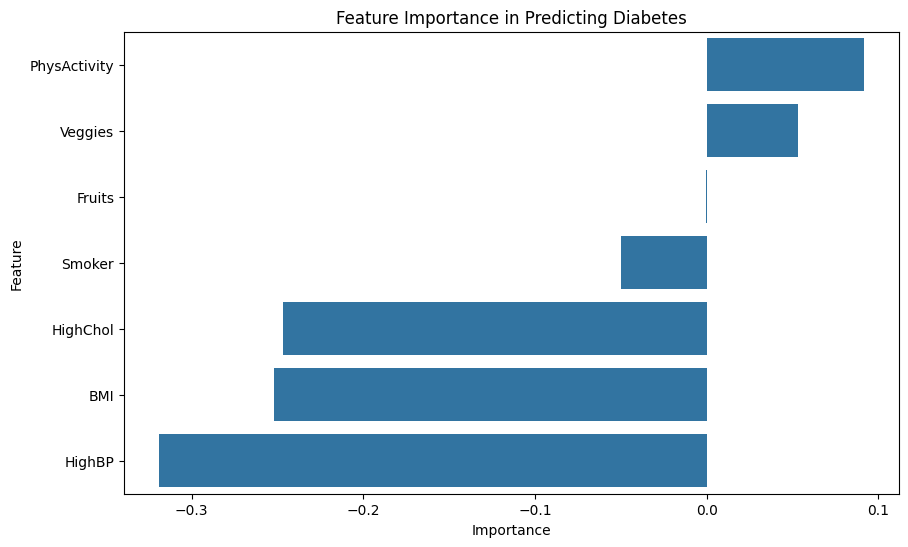

In [ ]:
missing_values = diabetes_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


diabetes_data_cleaned = diabetes_data.dropna()


numerical_features =health_behaviors
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data_cleaned[numerical_features ])


scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)


scaled_features_df['Diabetes_012'] = diabetes_data_cleaned['Diabetes_012'].values


scaled_features_df.head()


X = scaled_features_df.drop('Diabetes_012', axis=1)
y = scaled_features_df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


print("Feature Importance:\n", feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Diabetes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
import pickle

classifier = LinearRegression()
classifier.fit(X_train, y_train)



LinearRegression()

In [ ]:
filename = 'diabetic.sav'
pickle.dump(classifier, open(filename, 'wb'))